# Análise de Dados Magalu

### Análise de Dados: Geladeiras

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('output/dataset_geladeira.csv', sep=';')

In [3]:
df.head()

,descricao,preco,avaliacao,quantidade_avaliacoes,URL
0,Geladeira/Refrigerador Brastemp Frost Free Inv...,4399.00,4,112,https://www.magazineluiza.com.br/geladeira-ref...
1,Refrigerador Electrolux Cycle Defrost 260 Litr...,1783.30,4,43,https://www.magazineluiza.com.br/refrigerador-...
2,Geladeira/Refrigerador Frost Free cor Inox 310...,2324.07,4,197,https://www.magazineluiza.com.br/geladeira-ref...
3,Geladeira/Refrigerador Brastemp Frost Free Duplex,2799.00,4,82,https://www.magazineluiza.com.br/geladeira-ref...
4,Geladeira/Refrigerador Brastemp Frost Free Evox,6499.00,4,69,https://www.magazineluiza.com.br/geladeira-ref...


In [4]:
df.count()

descricao                1012
preco                     788
avaliacao                1012
quantidade_avaliacoes    1012
URL                      1012
dtype: int64

## Verificação de Valores Nulos: NaN

In [5]:
df.isnull().sum().sum()

224

In [6]:
df['preco'].isnull().sum()

224

A coluna de preços contém valores nulos. É melhor excluir esses registros do que substituir por um valor de preço = 0

In [7]:
df = df.dropna()

In [8]:
df.count()

descricao                788
preco                    788
avaliacao                788
quantidade_avaliacoes    788
URL                      788
dtype: int64

Agora os registros com preço nulo foram excluídos do dataframe

## Estatística descritiva

Seguem algumas estatísticas descritivas relativas aos smartphones:

In [9]:
df.describe()

,preco,avaliacao,quantidade_avaliacoes
count,788.000000,788.000000,788.000000
mean,4018.460089,4.737310,5.258883
std,2972.744369,0.597137,19.433763
min,37.760000,1.000000,0.000000
25%,2514.682500,5.000000,0.000000
50%,3347.550000,5.000000,0.000000
75%,4319.100000,5.000000,2.000000
max,28709.000000,5.000000,262.000000


## Histograma: Distribuição de Frequencias

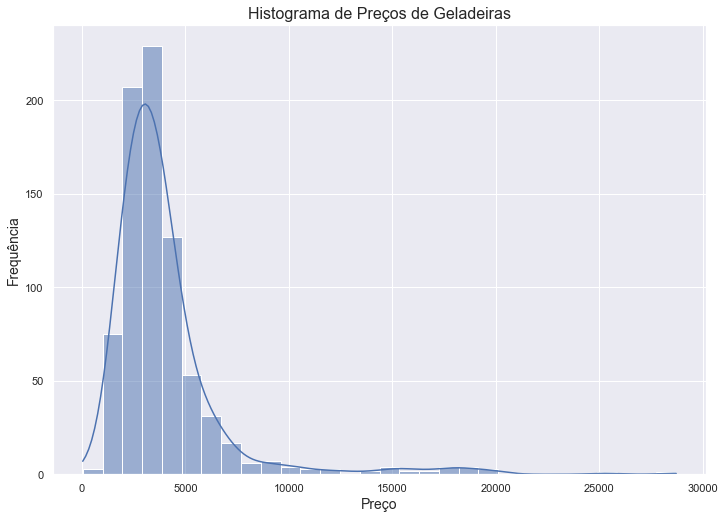

In [37]:
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})
histplot = sns.histplot(data=df, x='preco', linewidth=1, bins=30, kde=True)
histplot.axes.set_title("Histograma de Preços de Geladeiras", fontsize=16)
histplot.set_xlabel("Preço", fontsize=14)
histplot.set_ylabel("Frequência", fontsize=14)
plt.show()

A distribuição é fortemente assimétrica dada a presença de outliers

## Boxplot: Visualização de outliers

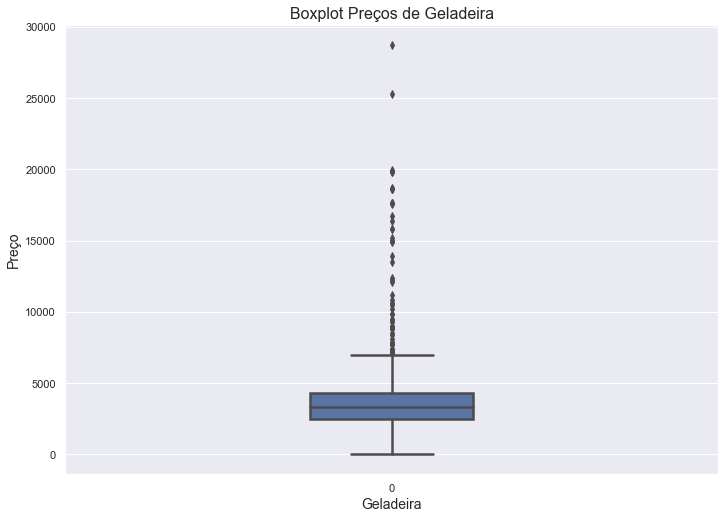

In [38]:
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})
boxplot = sns.boxplot(data=df['preco'], linewidth=2.5, width=0.25)
boxplot.axes.set_title("Boxplot Preços de Geladeira", fontsize=16)
boxplot.set_xlabel("Geladeira", fontsize=14)
boxplot.set_ylabel("Preço", fontsize=14)
plt.show()

### Remoção de Outliers

Percebe-se que há outliers no departamento de smartphones.

Podem ser acessórios para smartphones com preços muito baixos, ou celulares com preços muito acima da média

Haverá agora um trabalho de remoção de outliers do nosso dataset

### Função que retira os indices dos outliers do nosso dataframe

In [12]:
def outliers_indexes(df, ft):
    """ 
    Função que retorna o índice dos outliers
    Embasamento matemático:
    Amplitude Interquartil => IQR = Quartil_3 - Quartil_1
    Limite Inferior => LI = Quartil_1 - 1.5*IQR
    Limite Superior => LS = Quartil_3 + 1.5*IQR
    Todos os dados que estiverem acima do limite superior ou abaixo do limite inferior, são outliers
    """
    Q1 = df[ft].quantile(0.25)
    Q3 = df[ft].quantile(0.75)
    IQR = Q3 - Q1
    
    LI = Q1 - 1.5*IQR
    LS = Q3 + 1.5*IQR
    
    lista_indices = df.index[ (df[ft] < LI) | (df[ft] > LS) ]
    
    return lista_indices

In [13]:
# Cria-se uma lista vazia para armazenar os índices de saídas de múltiplas colunas 
# (somente caso se quisesse tirar outliers de multiplas colunas)
index_list = []
for feature in ['preco', 'quantidade_avaliacoes']:
    index_list.extend(outliers_indexes(df, feature))

Será usada uma versão mais simples, apenas para retornar os índices de uma única coluna, o preço

In [14]:
outliers_index_list = outliers_indexes(df, 'preco')

In [15]:
outliers_index_list

Int64Index([ 77, 102, 113, 140, 167, 197, 232, 252, 254, 260, 280, 282, 290,
            297, 329, 340, 355, 373, 392, 393, 450, 454, 455, 463, 473, 484,
            508, 517, 518, 556, 558, 573, 576, 582, 583, 590, 598, 611, 616,
            637, 664, 725, 733, 784, 846, 849, 895, 904, 914, 953, 963, 976,
            998],
           dtype='int64')

In [16]:
len(outliers_index_list)

53

### Função de Remoção de Outliers

Por fim, define-se uma função para a remoção de todos os registros que contém outliers, tendo a lista de índices como input

In [17]:
def remove_outliers(df, index_list):
    index_list = sorted(set(index_list))
    # Drop dos outliers
    df = df.drop(index_list)
    return df   

### Limpa-se o dataframe dos outliers

In [18]:
df_clean = remove_outliers(df, outliers_index_list)

In [28]:
df_clean.shape

(733, 5)

### Remove-se os itens com valor muito baixo

In [29]:
df_mask = df_clean['preco'] >= 1000
df_clean = df_clean[df_mask]

## Histograma: Distribuição de Frequência (Outliers removidos)

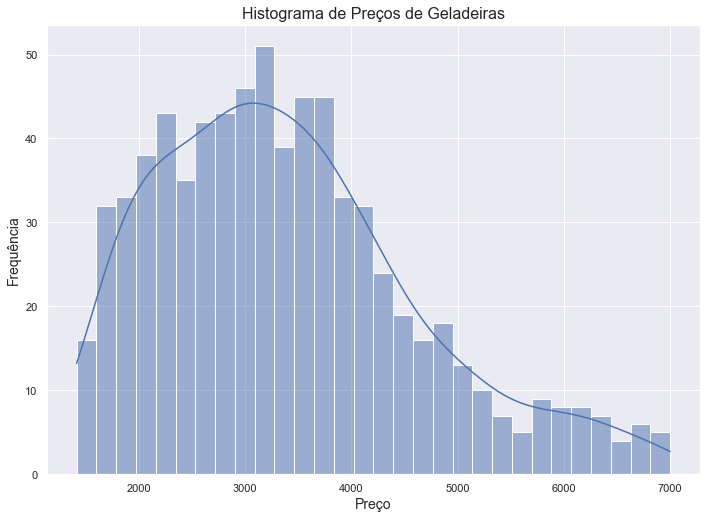

In [39]:
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})
histplot = sns.histplot(data=df_clean, x='preco', linewidth=1, bins=30, kde=True)
histplot.axes.set_title("Histograma de Preços de Geladeiras", fontsize=16)
histplot.set_xlabel("Preço", fontsize=14)
histplot.set_ylabel("Frequência", fontsize=14)
plt.show()

Nota-se maior simetria na distribuição após a remoção dos outliers, ainda que esta não seja uma distribuição Gaussiana

## Boxplot sem Outliers

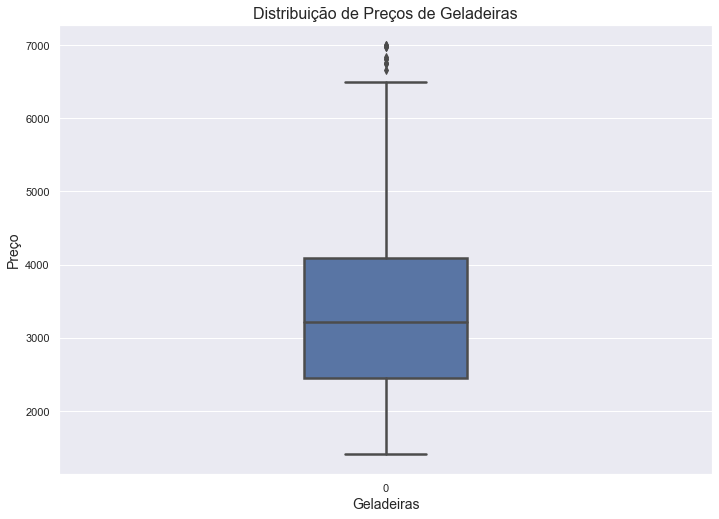

In [41]:
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})
boxplot = sns.boxplot(data=df_clean['preco'], linewidth=2.5, width=0.25)
boxplot.axes.set_title("Distribuição de Preços de Geladeiras", fontsize=16)
boxplot.set_xlabel("Geladeiras", fontsize=14)
boxplot.set_ylabel("Preço", fontsize=14)
plt.show()

## Estatística descritiva, sem outliers

In [32]:
df_clean.describe()

,preco,avaliacao,quantidade_avaliacoes
count,732.000000,732.000000,732.000000
mean,3390.682199,4.728142,5.636612
std,1225.894128,0.599704,20.113404
min,1413.800000,1.000000,0.000000
25%,2451.727500,5.000000,0.000000
50%,3211.010000,5.000000,0.000000
75%,4093.052500,5.000000,2.000000
max,6999.900000,5.000000,262.000000


Verifica-se assim que:
 - A média de preço de um Smartphone está em torno de 4000,00 reais, com 1700,00 reais para mais ou para menos
 - A Mediana do preço de um smartphone é 3700 reais
 - A média de quantidade de avaliações é 2 por produto. A baixa quantidade pode indicar que essa medida não é confiável

## Item Mais Caro (Outliers não removidos)

In [42]:
df_mask = df['preco'] == max(df['preco'])
filtered_df = df[df_mask]
print(filtered_df)

                                            descricao    preco  avaliacao  \
77  Geladeira Samsung RF27T Inverter Frost Free Sm...  28709.0          3   

    quantidade_avaliacoes                                                URL  
77                      3  https://www.magazineluiza.com.br/geladeira-sam...  


## Item Mais Caro (Outliers Removidos)

In [34]:
df_mask = df_clean['preco'] == max(df_clean['preco'])
filtered_df = df_clean[df_mask]
print(filtered_df)

                                         descricao   preco  avaliacao  \
1000  Refrigerador Philco French Door 396L PRF406I  6999.9          5   

      quantidade_avaliacoes                                                URL  
1000                      0  https://www.magazineluiza.com.br/refrigerador-...  


## Item mais barato

In [35]:
df_mask = df_clean['preco'] >= 300
filtered_df = df_clean[df_mask]
print(filtered_df.sort_values(by=['preco'], ascending=True)[:5])

                                              descricao    preco  avaliacao  \
93    Refrigerador 245 Litros Esmaltec 1 Porta Class...  1413.80          5   
1001  Refrigerador Electrolux Degelo Prático 240 Lit...  1413.83          4   
161   Geladeira Cycle Defrost Electrolux 240 Litros ...  1420.33          4   
532   Geladeira Refrigerador Electrolux 240 Litros 1...  1439.01          4   
60    Refrigerador Consul CRA30FB 261 Litros Branco ...  1453.82          4   

      quantidade_avaliacoes                                                URL  
93                        0  https://www.magazineluiza.com.br/refrigerador-...  
1001                     11  https://www.magazineluiza.com.br/refrigerador-...  
161                      89  https://www.magazineluiza.com.br/geladeira-cyc...  
532                       2  https://www.magazineluiza.com.br/geladeira-ref...  
60                       22  https://www.magazineluiza.com.br/refrigerador-...  


 Refrigerador 245 Litros Esmaltec 1 Porta de 1413,80 reais

## 5 itens com preço menor ou igual a média

In [36]:
df_mask = df_clean['preco'] <= df_clean['preco'].mean()
filtered_df = df_clean[df_mask]
print(filtered_df.sort_values(by=['preco'], ascending=False)[:5])

                                             descricao    preco  avaliacao  \
17   Geladeira Brastemp Frost Free Duplex 375 litro...  3389.00          5   
847  Geladeira Brastemp Frost Free Duplex 375 litro...  3389.00          5   
410  Geladeira/Refrigerador Frost Free 431 Litros E...  3372.71          4   
235  Geladeira/Refrigerador Frost Free 431 Litros E...  3372.71          1   
728  Geladeira Duplex Top Freezer Electrolux 474 Li...  3359.97          5   

     quantidade_avaliacoes                                                URL  
17                       0  https://www.magazineluiza.com.br/geladeira-bra...  
847                      0  https://www.magazineluiza.com.br/geladeira-bra...  
410                      2  https://www.magazineluiza.com.br/geladeira-ref...  
235                      1  https://www.magazineluiza.com.br/geladeira-ref...  
728                      0  https://www.magazineluiza.com.br/geladeira-dup...  


Estes itens são considerados mid-range e tem uma boa relação custo-benefício.